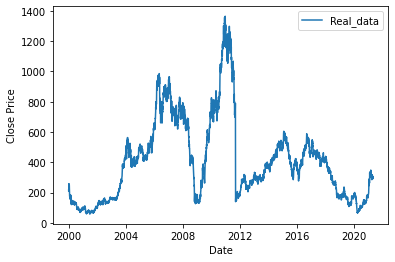

In [ ]:
# Outlook on the Close trend
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
dataframe = pd.read_csv('/content/TATAMOTORS.csv', usecols=['Date','Close'], index_col=False)
#dataframe = dataframe.iloc[::-1]
#print(dataframe)
plt.plot(pd.to_datetime(dataframe['Date']), dataframe['Close'],label='Real_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('/content/TATAMOTORS.csv', usecols=['Close'], index_col=False)
#print(dataframe.head())
#print(dataframe)
#dataframe = dataframe.iloc[::-1]

dataframe = dataframe.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe

,Close
0,216.75
1,208.20
2,213.25
3,222.10
4,239.90
...,...
5301,295.40
5302,301.50
5303,305.90
5304,301.90


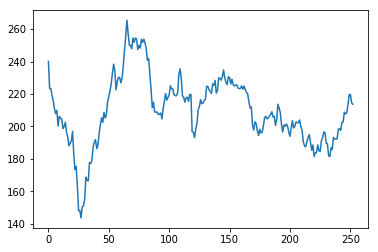

In [ ]:
plt.plot(dataframe.index, dataframe['Close'])
plt.show()

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
from keras.layers import LSTM
from keras.optimizers import Adam,RMSprop
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# Conversuin of our data to floats as it is more suitable for this neural networks
# print(dataframe)
dataset = dataframe.values
print(dataset)
dataset = dataset.astype('float32')

[[216.75]
 [208.2 ]
 [213.25]
 ...
 [305.9 ]
 [301.9 ]
 [293.85]]


In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
print(len(dataset))
train_size = int(len(dataset)-63)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# print(train)

5306
5243 63


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(testY)
# print(trainX)

[0.15608375 0.16902055 0.2014774  0.20836683 0.20465419 0.19680789
 0.21215601 0.20381214 0.20675929 0.20377387 0.20408006 0.21016572
 0.20698895 0.20771615 0.20289356 0.19370766 0.1880813  0.20300838
 0.20120947 0.21001263 0.20220461 0.20629998 0.21965782 0.22176291
 0.21464385 0.20388868 0.20090328 0.19627206 0.20105638 0.19807094
 0.19883645 0.19990815 0.18907642 0.18999502 0.19148774 0.18697132
 0.19030121 0.18038811 0.17357522 0.1818808  0.18237837 0.18601446
 0.19056913 0.1885023  0.19056913 0.1906074  0.1953152  0.19856854
 0.17434071 0.18681823 0.18731579 0.1922915  0.18570827 0.18314385
 0.18046464 0.18004362 0.18111531 0.18578482 0.18915297 0.186091  ]


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, Conv2D, MaxPooling2D,MaxPooling1D
cnn = Sequential()
cnn.add(Conv1D(4, kernel_size=2, strides=1,padding='same',
                 activation='relu',
                 input_shape=(2,1)))
cnn.add(MaxPooling1D(pool_size=2))

cnn.add(Flatten())
cnn.add(Dense(30))

cnn.add(Dense(1))
cnn.summary()
cnn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 4)              12        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 4)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 30)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
__________________________________________________________

In [ ]:
print(trainX.shape)
x_train2 = trainX.reshape((5240,2,1))
print(x_train2.shape)
print(trainY.shape)
print(testX.shape)
x_test2 = testX.reshape((60,2,1))

# cnn.fit(x_train2, trainY, epochs=100, batch_size=1, verbose=2)

(5240, 1, 2)
(5240, 2, 1)
(5240,)
(60, 1, 2)


In [ ]:
cnn.fit(x_train2,trainY, batch_size=1,verbose=2,epochs=10)

Epoch 1/10
5240/5240 - 8s - loss: 2.3651e-04 - 8s/epoch - 1ms/step
Epoch 2/10
5240/5240 - 8s - loss: 2.2180e-04 - 8s/epoch - 1ms/step
Epoch 3/10
5240/5240 - 8s - loss: 2.0931e-04 - 8s/epoch - 1ms/step
Epoch 4/10
5240/5240 - 7s - loss: 2.0873e-04 - 7s/epoch - 1ms/step
Epoch 5/10
5240/5240 - 8s - loss: 2.1321e-04 - 8s/epoch - 1ms/step
Epoch 6/10
5240/5240 - 7s - loss: 2.1178e-04 - 7s/epoch - 1ms/step
Epoch 7/10
5240/5240 - 8s - loss: 2.0481e-04 - 8s/epoch - 1ms/step
Epoch 8/10
5240/5240 - 8s - loss: 2.1085e-04 - 8s/epoch - 1ms/step
Epoch 9/10
5240/5240 - 7s - loss: 2.0095e-04 - 7s/epoch - 1ms/step
Epoch 10/10
5240/5240 - 8s - loss: 1.9979e-04 - 8s/epoch - 1ms/step


In [ ]:
trainPredict = cnn.predict(x_train2)
testPredict = cnn.predict(x_test2)
# invert predictions
# print(trainPredict)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error



2/2 [==============================] - 0s 5ms/step
[[214.19868]
 [219.26178]
 [228.13467]
 ...
 [264.7793 ]
 [281.07132]
 [296.81192]]


In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Train Score: 17.45 RMSE
Test Score: 12.05 RMSE


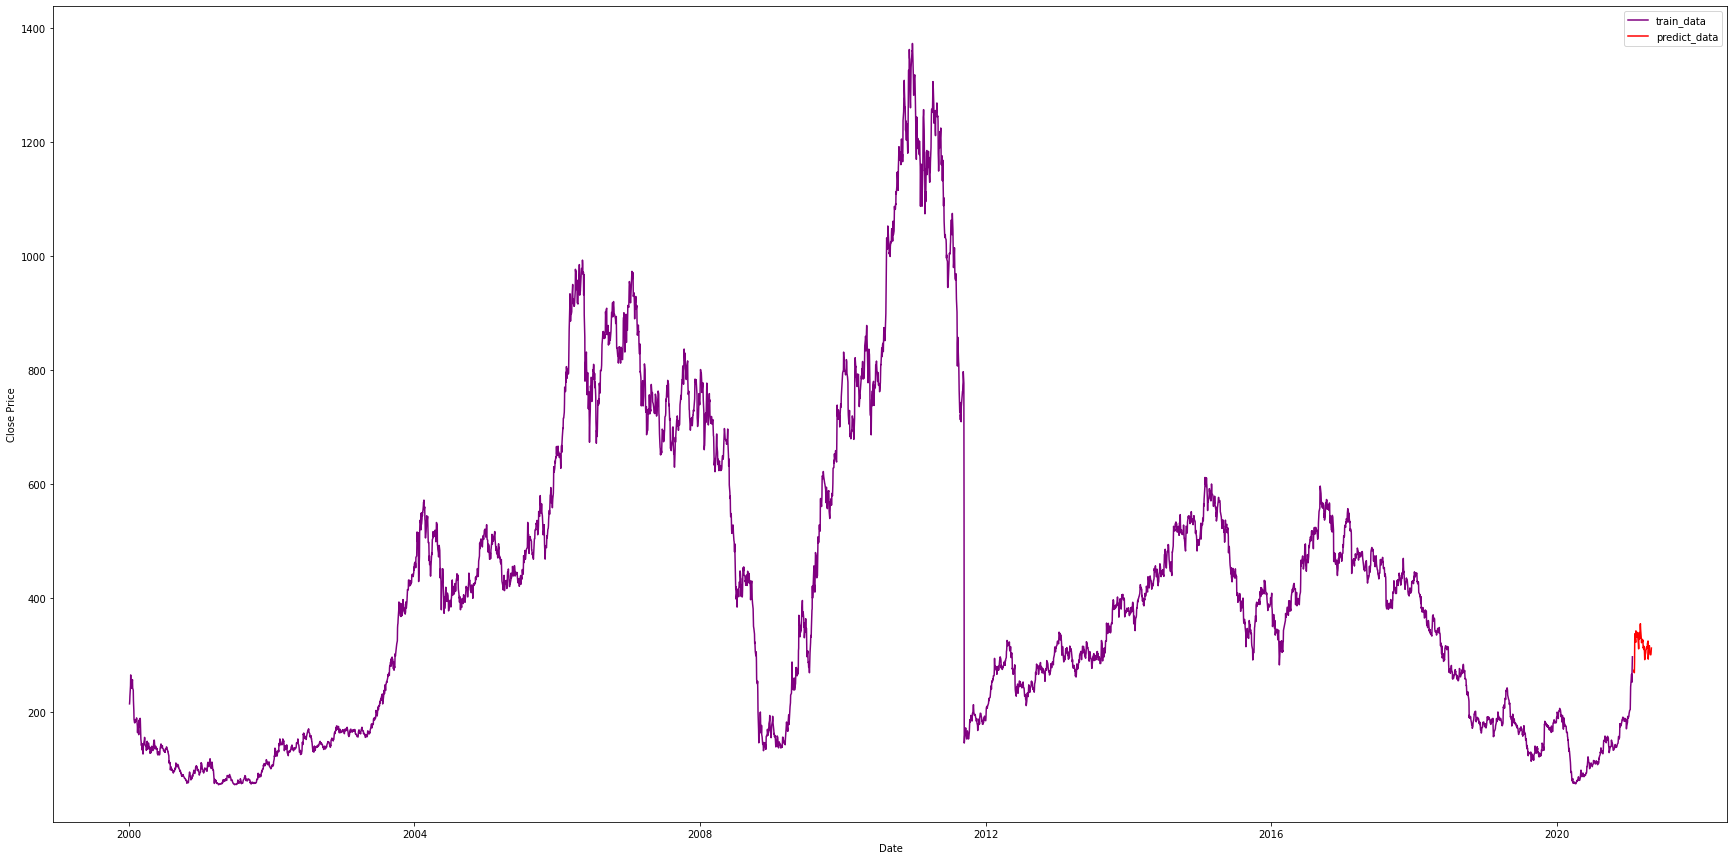

In [ ]:
# shift train predictions for plotting
dataframe1 = pd.read_csv('/content/TATAMOTORS.csv', usecols=['Date'], index_col=False)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 15)
fig.savefig('test2png.png',dpi=100)

# plt.plot(scaler.inverse_transform(dataset))
plt.plot(pd.to_datetime(dataframe1['Date']),trainPredictPlot, color='purple',label='train_data')
plt.plot(pd.to_datetime(dataframe1['Date']),testPredictPlot, color='red',label='predict_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
!pip install mpl_finance

In [ ]:
import csv
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md
import mpl_finance as mpf
import matplotlib.pyplot as plt
import os
from datetime import datetime
Data_Predict=[]

Data_Predict = numpy.empty_like(dataset)
Data_Predict[:, :] = numpy.nan
Data_Predict[look_back:len(trainPredict)+look_back, :] = trainPredict
Data_Predict[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Data_Predict[0:1, :] = dataframe[0:1, :]
# print(Data_Predict)
Close_Predict=[]
Data_Prepare=Data_Predict.tolist()
for sublist in Data_Prepare:
    for item in sublist:
        Close_Predict.append(item)
# print(Data_Predict1)
print(len(Close_Predict))
filename = '/content/TATAMOTORS.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    Date, Open, High, Low, Close = [], [], [], [], []
    print(reader)
    for row in reader:
        current_date = datetime.strptime(row[0], '%Y-%m-%d')
        Date.append(current_date)

        Close1 = float(row[4])
        Close.append(Close1)
#         print(Open)
#         High1 = float(row[1])
        High.append(140)

#         Low1 = float(row[2])
#         print(type(Low1))
        Low.append(140)

#         Close1 = float(row[4])
#         Close.append(Close_Predict)
#         print(Date)
# print(Low)
datas = []
for i in range(len(Date)):
    datas.append([md.date2num(Date[i]), float(Close[i]), float(High[i]), \
                 float(Low[i]), float(Close_Predict[i])])

5306


([<matplotlib.lines.Line2D at 0x7f76a805e7f0>,
  ...],
  ...])

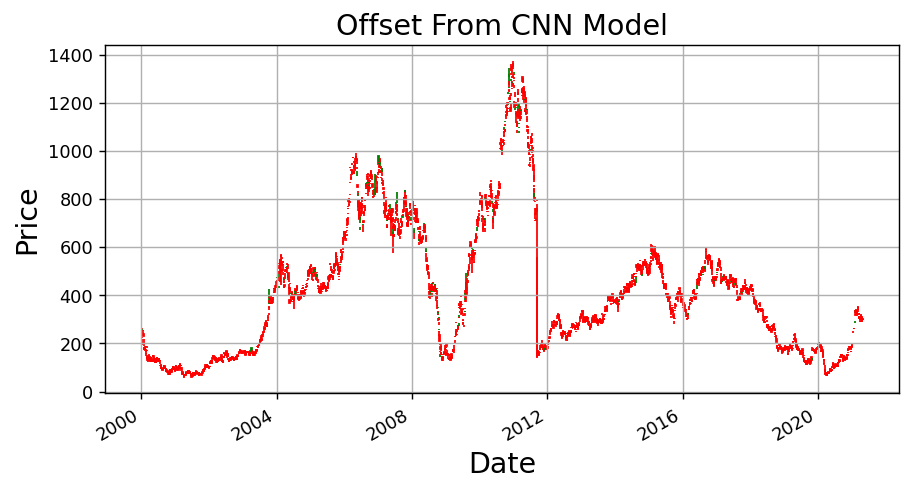

In [ ]:
fig = plt.figure(2, dpi =128, figsize =(8,4))
fig.set_size_inches(8, 4)
ax2 = plt.subplot(111)
ax2.set_title('Offset From CNN Model', fontsize =16)
ax2.set_xlabel('Date', fontsize =16)
ax2.set_ylabel('Price', fontsize =16)
ax2.grid(True)                            #显示网格
ax2.xaxis_date()                         #显示为日期
fig.autofmt_xdate()
mpf.candlestick_ohlc(ax2, datas, width =0.6, colorup ='r', colordown ='g')

[nan, nan, 20.198684692382812, 4.26177978515625, 4.134674072265625, -13.019271850585938, 4.97979736328125, 4.2261962890625, 3.3316650390625, 6.569226074218761, 2.178555297851574, 5.758544921875, 3.10174560546875, 6.60821533203125, 11.669882202148443, 8.260818481445312, 19.312780761718756, 12.568695068359375, 15.828033447265625, 9.963281249999994, 5.724923706054682, -2.786468505859375, 6.0259857177734375, 4.26885986328125, 6.772985839843756, 4.72003173828125, 0.5272674560546875, 4.685159301757807, 3.128549194335932, 5.6491851806640625, 5.618243408203114, -0.11105041503907387, 5.73651123046875, 6.240386962890625, 10.058929443359375, -1.4590972900390682, -4.074545288085943, 3.044778442382807, 1.7004669189453239, 4.833221435546875, 6.928408813476551, 5.49102783203125, 0.467742919921875, 15.639785766601562, 1.0095153808593693, 14.568954467773438, 3.9017333984375, 5.2898406982421875, 13.5162353515625, 3.294747924804682, 3.3213226318359403, 0.796295166015625, 5.009765625, 8.236160278320312, 2

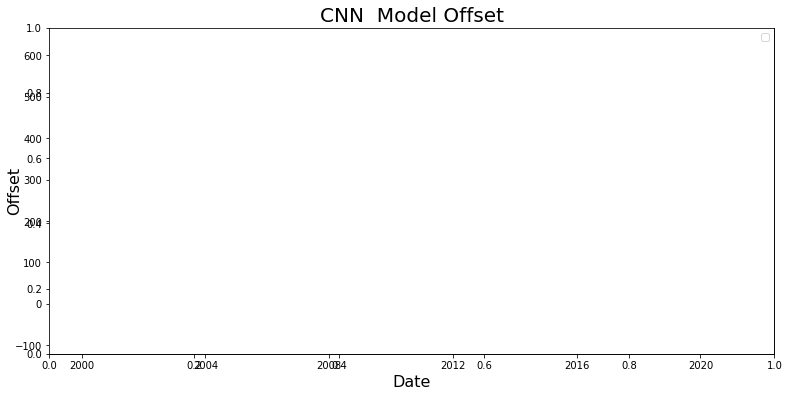

In [ ]:
Data_Analysis = []
fig=plt.figure()
for i in range(len(Close)):
    Data_Analysis.append(float(Close_Predict[i])-float(Close[i]))
print(Data_Analysis)

rects=plt.bar(Date, Data_Analysis,label='offset')
plt.plot(Date, Data_Analysis, color='yellow')
# plt.hist(Date, Data_Analysis, normed=1, facecolor='blue', alpha=0.5)
# for rect in rects:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width() / 2, height, str(Data_Analysis), ha='center', va='bottom')
# for xx, yy in zip(len(Data_Analysis),Data_Analysis):
#     plt.text(xx, yy+0.1, yy, ha='center')
# plt.plot(pd.to_datetime(dataframe1['Date']), scaler.inverse_transform(dataset),label='Real_data')
fig.set_size_inches(13, 6)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Date', fontsize =16)
ax.set_ylabel('Offset', fontsize =16)
ax.set_title("CNN  Model Offset",fontsize=20)
plt.legend(['Offset'],loc='upper right')
plt.show()

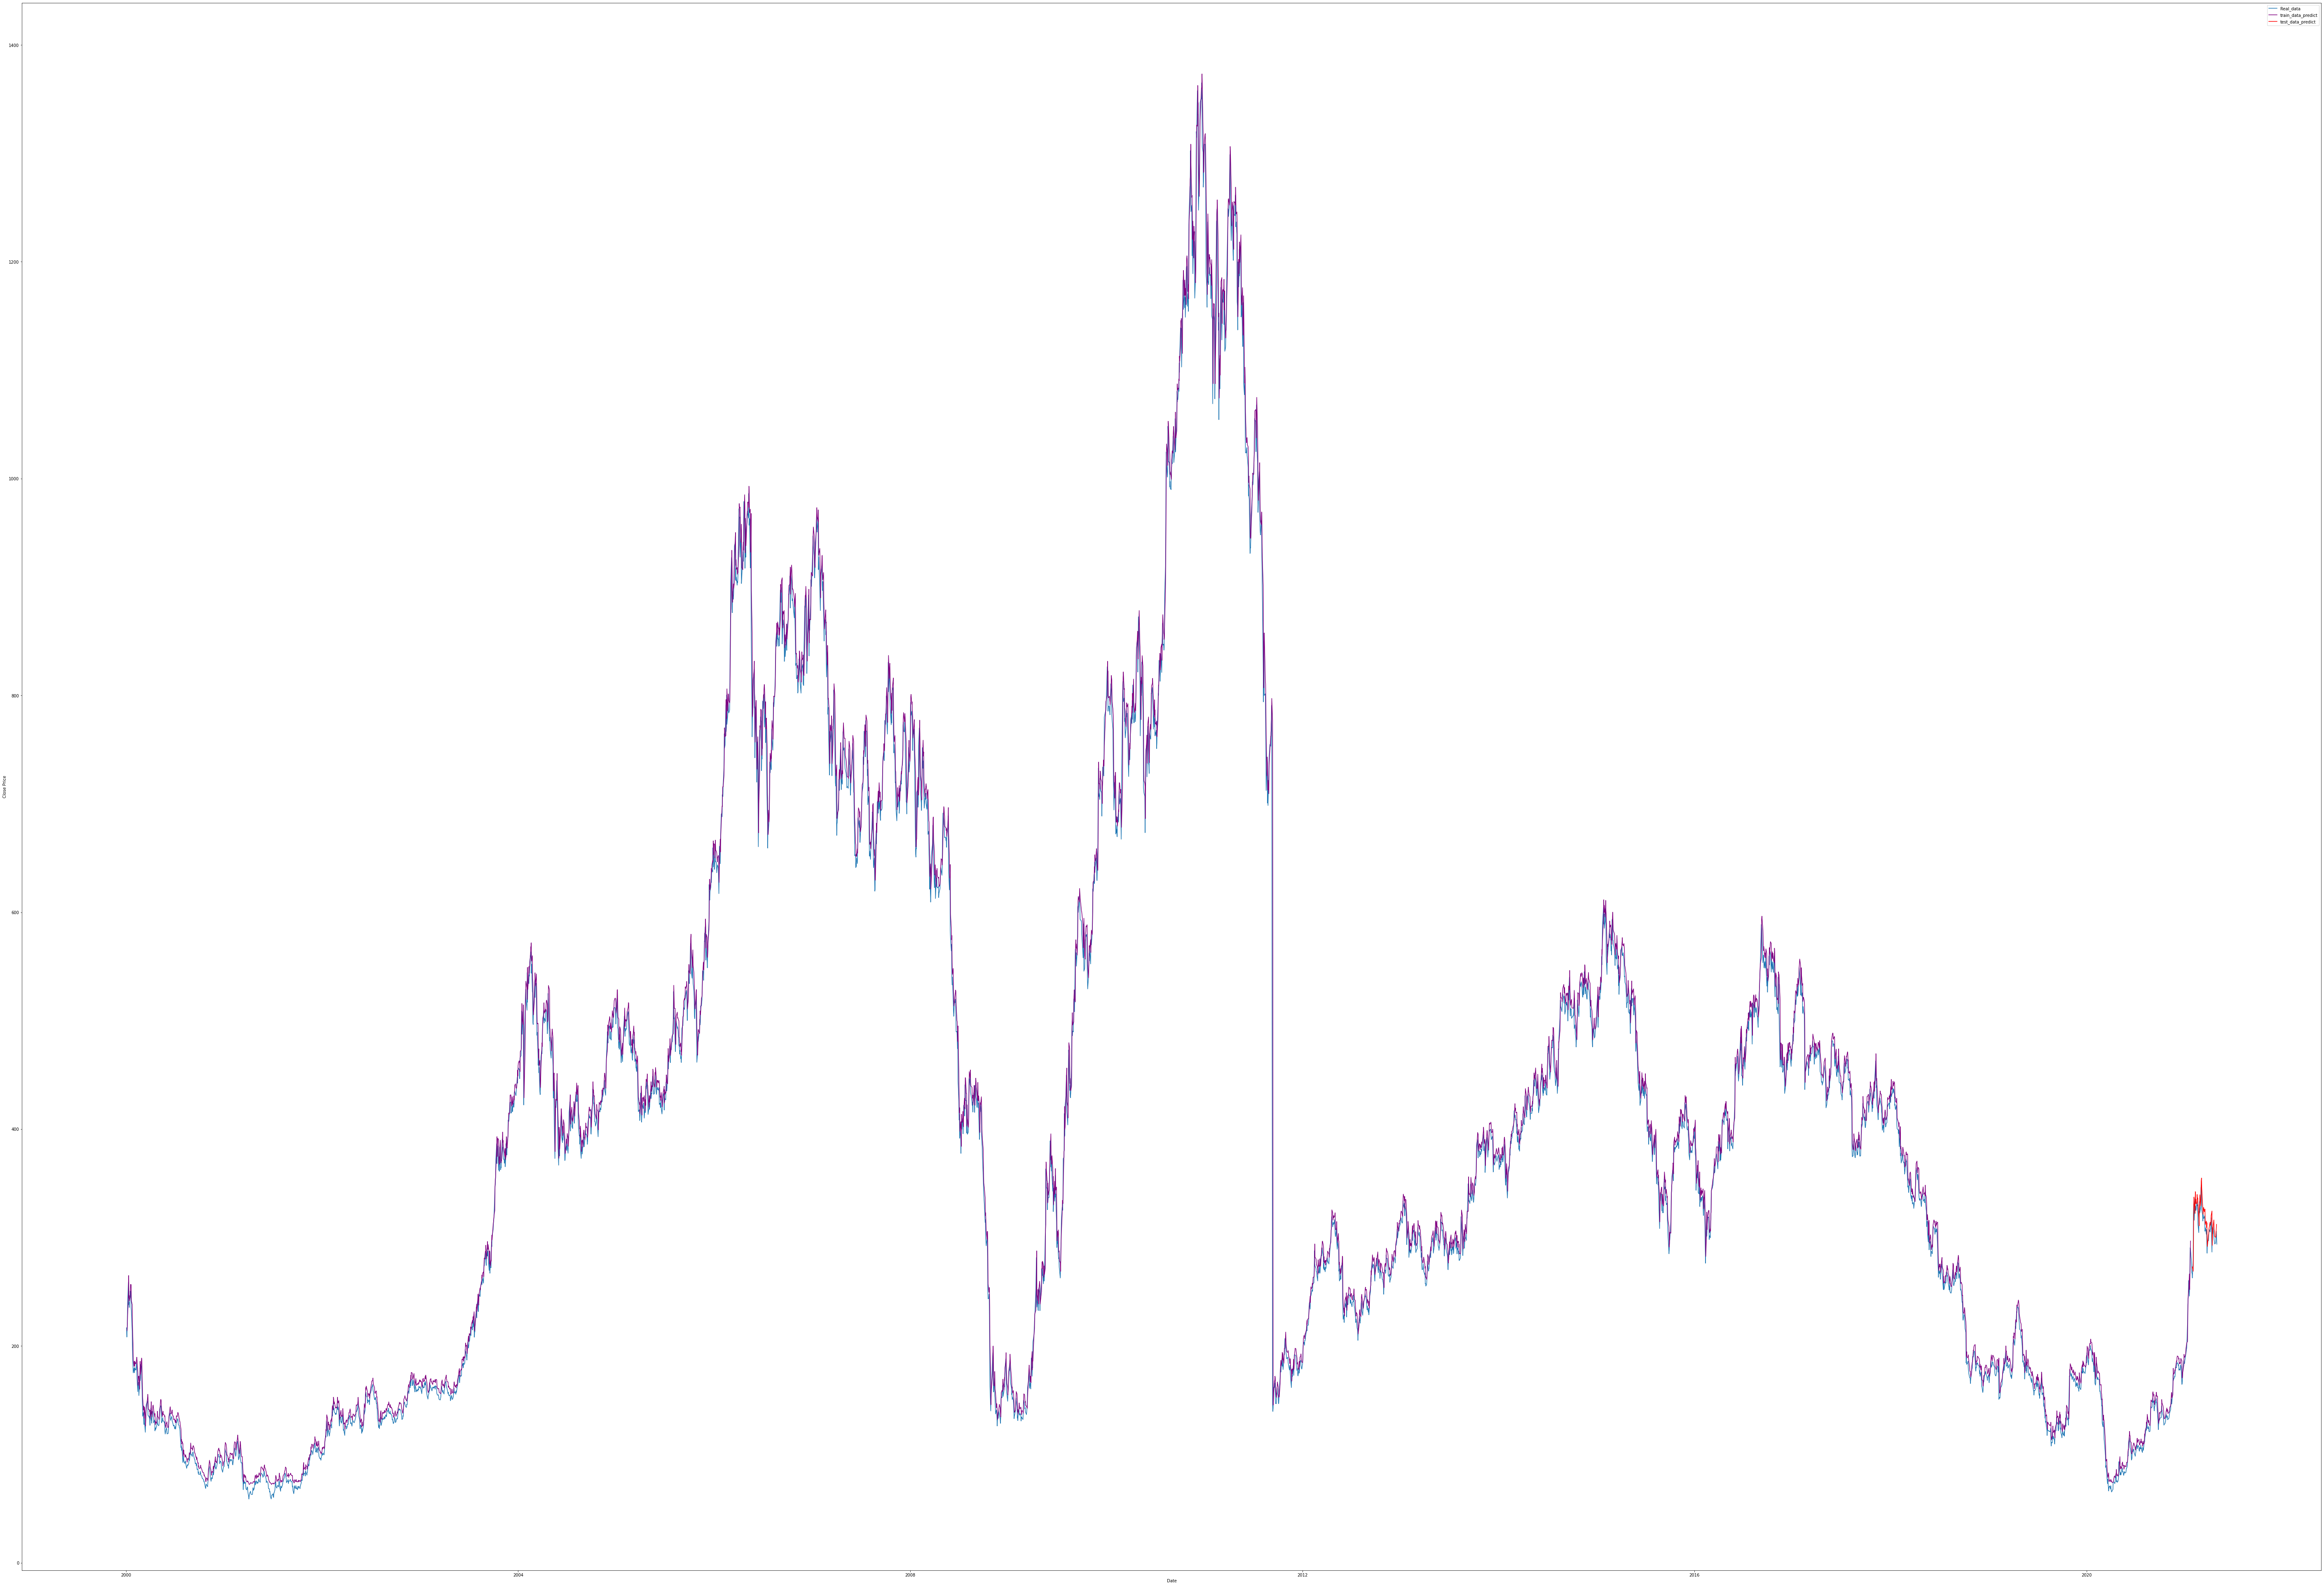

In [ ]:
dataframe1 = pd.read_csv('/content/TATAMOTORS.csv', usecols=['Date'], index_col=False)
#dataframe1 = dataframe1.iloc[::-1]#去掉最后一列

dataframe1 = dataframe1.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe1
plt.plot(pd.to_datetime(dataframe1['Date']), scaler.inverse_transform(dataset),label='Real_data')
plt.plot(pd.to_datetime(dataframe1['Date']),trainPredictPlot, color='purple',label='train_data_predict')
plt.plot(pd.to_datetime(dataframe1['Date']),testPredictPlot, color='red',label='test_data_predict')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(100,70)

plt.show()

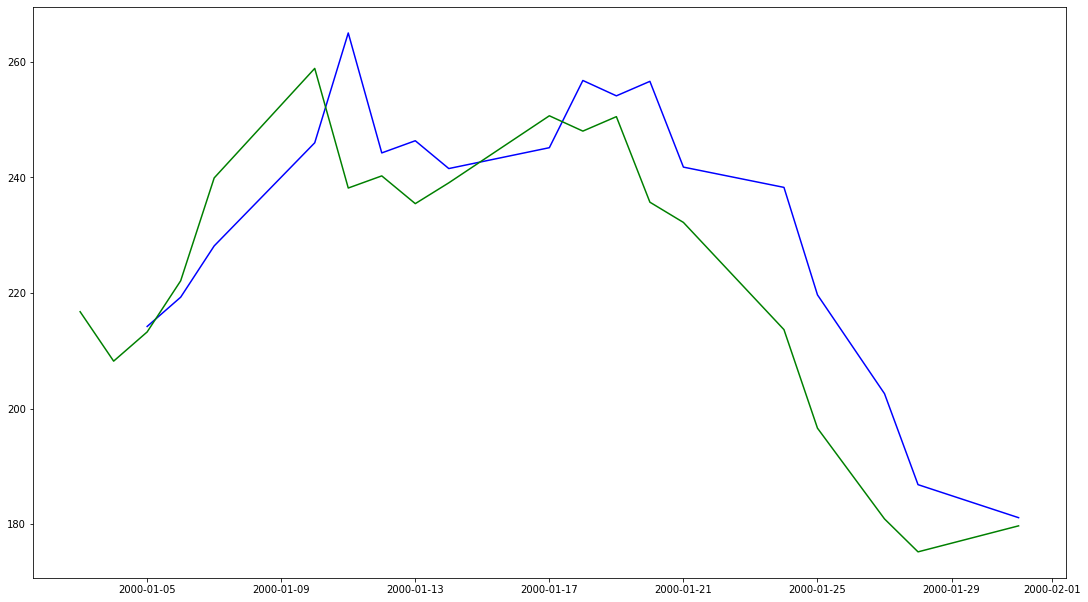

In [ ]:
df_o = pd.DataFrame(scaler.inverse_transform(dataset), columns=["Close"])
result_o = pd.concat([dataframe1, df_o], axis=1)
result_o = result_o.reindex(dataframe1.index)


df_train = pd.DataFrame(trainPredictPlot, columns=["Close"])
result_train = pd.concat([dataframe1, df_train], axis=1)
result_train = result_train.reindex(dataframe1.index)

df_test = pd.DataFrame(testPredictPlot, columns=["Close"])
result_test = pd.concat([dataframe1, df_test], axis=1)
result_test = result_test.reindex(dataframe1.index)


plt.plot(pd.to_datetime(result_train['Date'].head(20)), result_train['Close'].head(20), color='blue')
plt.plot(pd.to_datetime(result_o.head(20)['Date']), result_o.head(20)['Close'], color='green')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
result_train

,Date,Close
0,2000-01-03,NaN
1,2000-01-04,NaN
2,2000-01-05,214.198685
3,2000-01-06,219.261780
4,2000-01-07,228.134674
...,...,...
5301,2021-04-26,NaN
5302,2021-04-27,NaN
5303,2021-04-28,NaN
5304,2021-04-29,NaN


In [ ]:
result_test.tail(24)

,Date,Close
5282,2021-03-24,313.655457
5283,2021-03-25,300.671936
5284,2021-03-26,291.748871
5285,2021-03-30,302.626984
5286,2021-03-31,303.278656
5287,2021-04-01,308.040955
5288,2021-04-05,314.006348
5289,2021-04-06,311.299316
5290,2021-04-07,314.006348
5291,2021-04-08,314.056427
